In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger

plt.rcParams['figure.figsize'] = (15, 5)

Let's continue to explore our NYC 311 service requests example. Load the dataframe as previously

In [44]:
request = pd.read_csv('../data/311-service-requests.csv', encoding='latin1',)
request.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

# 3.1 Selecting only noise complaints

In this section we are going to select only noise Complaints. To do that we are going to select only a few rows using the .loc attribute withs masks (or filters). The idea is to build a mask with a condition

For instance the mask `mask = df['column_name'] == 'something'` will return a column of boolean telling if the row has the value 'something'

Then we can select the corresponding lines in the dataset using 

`df[mask]`

Select rows corresponding the `'Complaint Type'` being `'Noise - Street/Sidewalk'`. Print the mask to check that it contains bolean values

Of course we can get more complexe masks. For instance we can use the and operator : & and the or operator |. Beware not using `and` and `or` as it does not work in pandas. Build a mask selecting all kind of noise complaints. You can use the `.unique()` methods or `.value_counts()` to see all noise complaint types

In [47]:
masktou = request['Complaint Type'] == 'Noise'
masktou
#maskcom = request['Complaint Type'] == 'Noise - Commercial'
#maskveh = request['Complaint Type'] == 'Noise - Vehicule'
#maskst = request['Complaint Type'] == 'Noise - Street/Sidewalk'

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
111039    False
111040    False
111041     True
111042    False
111043    False
111044    False
111045    False
111046     True
111047    False
111048    False
111049    False
111050     True
111051    False
111052    False
111053    False
111054    False
111055    False
111056    False
111057     True
111058    False
111059    False
111060     True
111061    False
111062    False
111063    False
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Complaint Type, Le

In [42]:
don = request[maskcom]
don
donb=don['Complaint Type'].iloc[0:10]
donb

2     Noise - Commercial
5     Noise - Commercial
7     Noise - Commercial
8     Noise - Commercial
9     Noise - Commercial
11    Noise - Commercial
19    Noise - Commercial
21    Noise - Commercial
23    Noise - Commercial
37    Noise - Commercial
Name: Complaint Type, dtype: object

So now you the .loc returned all columns. You can also specify a few exemples by using `df[mask, list_column_name]`. If you want to select columns by index use .iloc instead

# 3.2 Which borough has the most noise complaints?

By using the previous mask for noise complaints, get the number of complaints for each Borough

In [51]:
pville = request[masktou]['Borough']
pville

73            MANHATTAN
74            MANHATTAN
79            MANHATTAN
82            MANHATTAN
83            MANHATTAN
94            MANHATTAN
110           MANHATTAN
132           MANHATTAN
134           MANHATTAN
144            BROOKLYN
145           MANHATTAN
148           MANHATTAN
153           MANHATTAN
155           MANHATTAN
163            BROOKLYN
173            BROOKLYN
177           MANHATTAN
182           MANHATTAN
196           MANHATTAN
199           MANHATTAN
208           MANHATTAN
222              QUEENS
223           MANHATTAN
224           MANHATTAN
230           MANHATTAN
254           MANHATTAN
257              QUEENS
263            BROOKLYN
317            BROOKLYN
328            BROOKLYN
              ...      
110374           QUEENS
110394         BROOKLYN
110443        MANHATTAN
110458    STATEN ISLAND
110519        MANHATTAN
110536            BRONX
110590        MANHATTAN
110753         BROOKLYN
110775        MANHATTAN
110778        MANHATTAN
110787        MA

Convert this number into percentage

In [58]:
freq = pville.value_counts()
freq

MANHATTAN        1848
BROOKLYN          767
QUEENS            418
BRONX             168
STATEN ISLAND     115
Unspecified         5
Name: Borough, dtype: int64

In [57]:
somme = sum(freq)
somme

3321

In [71]:
l = []
for i in range(len(freq)):
    l.append(round((freq[i]/somme)*100,2))

l

[55.65, 23.1, 12.59, 5.06, 3.46, 0.15]

In [73]:
percent = round(freq/freq.sum(),2)
percent

MANHATTAN        0.56
BROOKLYN         0.23
QUEENS           0.13
BRONX            0.05
STATEN ISLAND    0.03
Unspecified      0.00
Name: Borough, dtype: float64

Plot it

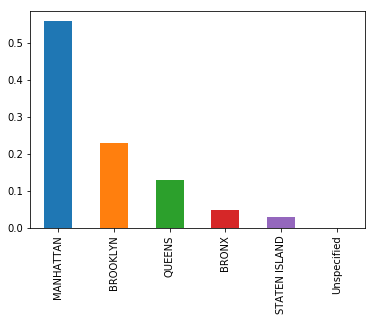

In [75]:
percent.plot.bar()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  